Introduction
Employee performance analysis is a crucial aspect of managing a workforce effectively. It involves evaluating and assessing employees' job performance to understand their strengths, weaknesses, and overall contributions to the organization

Problem Statement and Background
It is a critical metric for organizations to monitor employee performance as it can have negative impacts on productivity, morale, and overall business success. 
Understanding the reasons behind employee poor perfomance is essential for developing effective retention strategies.

Objectives
1.	Department wise performances 
2.  Perfomance based on Gender, Age, Education Background, Marital Status, Employee Job role, Business Travel Frequency, TotalWorkExperienceInYears, ExperienceYearsAtThisCompany, YearsSinceLastPromotion and ExperienceYearsInCurrentRole, Distance From Home, Employee Hourly Rate and OverTime
3.	Top 3 Important Factors effecting employee performance 
4.	A trained model which can predict the employee performance based on factors as inputs. This will be used to hire employees 
5.	Recommendations to improve the employee performance based on insights from analysis 


In [158]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import scipy.stats as stats
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import plotly.express as px
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [159]:
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import chi2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

UNDERSTANDING THE DATA

In [160]:
#import the dataset
data = pd.read_excel('INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls')
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


In [161]:
data.columns.values

array(['EmpNumber', 'Age', 'Gender', 'EducationBackground',
       'MaritalStatus', 'EmpDepartment', 'EmpJobRole',
       'BusinessTravelFrequency', 'DistanceFromHome', 'EmpEducationLevel',
       'EmpEnvironmentSatisfaction', 'EmpHourlyRate', 'EmpJobInvolvement',
       'EmpJobLevel', 'EmpJobSatisfaction', 'NumCompaniesWorked',
       'OverTime', 'EmpLastSalaryHikePercent',
       'EmpRelationshipSatisfaction', 'TotalWorkExperienceInYears',
       'TrainingTimesLastYear', 'EmpWorkLifeBalance',
       'ExperienceYearsAtThisCompany', 'ExperienceYearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition',
       'PerformanceRating'], dtype=object)

In [162]:
# shape of the dataset
data.shape

(1200, 28)

In [163]:
# Data overview
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

In [164]:
#Checking the mising valuse 
data.isnull().sum()

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

In [165]:
# Checking on duplicates

duplicates = data[data.duplicated()]
print("Duplicate Rows : ",len(duplicates))
duplicates.head()

Duplicate Rows :  0


,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating


In [166]:
#Basic statistical analysis of the dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1200.0,36.918333,9.087289,18.0,30.0,36.0,43.0,60.0
DistanceFromHome,1200.0,9.165833,8.176636,1.0,2.0,7.0,14.0,29.0
EmpEducationLevel,1200.0,2.892500,1.044120,1.0,2.0,3.0,4.0,5.0
EmpEnvironmentSatisfaction,1200.0,2.715833,1.090599,1.0,2.0,3.0,4.0,4.0
EmpHourlyRate,1200.0,65.981667,20.211302,30.0,48.0,66.0,83.0,100.0
EmpJobInvolvement,1200.0,2.731667,0.707164,1.0,2.0,3.0,3.0,4.0
EmpJobLevel,1200.0,2.067500,1.107836,1.0,1.0,2.0,3.0,5.0
EmpJobSatisfaction,1200.0,2.732500,1.100888,1.0,2.0,3.0,4.0,4.0
NumCompaniesWorked,1200.0,2.665000,2.469384,0.0,1.0,2.0,4.0,9.0
EmpLastSalaryHikePercent,1200.0,15.222500,3.625918,11.0,12.0,14.0,18.0,25.0


EXPLORATORY DATA ANALYSIS

1. Employee Department

In [167]:
fig = px.pie(data.groupby(['EmpDepartment'])['EmpNumber'].count().reset_index(), 
             values='EmpNumber', 
             names='EmpDepartment',
            title = 'Employee  Department')
fig.show()

Employee perfomance based on Department

In [168]:
fig = px.bar(data.groupby(['EmpDepartment',
                                                'PerformanceRating'])['EmpNumber'].count().reset_index(),
             x="EmpNumber",
             y="EmpDepartment", 
             color="PerformanceRating", 
             text = 'EmpNumber'
            )
fig.show()

Development Department has the highest number of employees with a perfomance rating of 4.
Sales Department has the highest number of employees with a perfomance rating of 2.

2. Gender

In [169]:
att1=data.groupby(['Gender'],as_index=False)['Age'].count()
att1.rename(columns={'Age':'Count'},inplace=True)
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"},{"type": "pie"}]],subplot_titles=('',''))
fig.add_trace(go.Pie(values=att1['Count'],labels=['Female','Male'],hole=0.7,marker_colors=['MediumVioletRed','DeepSkyBlue']),row=1,col=1)

fig.update_traces(textposition='outside', textinfo='percent+label')
fig.update_layout(title_x=0.5,template='simple_white',showlegend=True,legend_title_text="<b>Gender",title_text='<b style="color:black; font-size:120%;">Gender Overview',font_family="Times New Roman",title_font_family="Times New Roman")
fig.update_traces(marker=dict(line=dict(color='#000000', width=1.2)))
fig.show()

Perfomance rating based on based on Gender

In [170]:
att1=data.groupby('PerformanceRating',as_index=False)['EmpNumber'].count()
att1['Count']=att1['EmpNumber']
att1.drop('EmpNumber',axis=1,inplace=True)
att2=data.groupby(['Gender','PerformanceRating'],as_index=False)['EmpNumber'].count()
att2['Count']=att2['EmpNumber']
att2.drop('EmpNumber',axis=1,inplace=True)
fig=go.Figure()
fig=make_subplots(rows=1,cols=3)
fig = make_subplots(rows=1, cols=3, specs=[[{"type": "pie"}, {"type": "pie"}, {"type": "pie"}]],subplot_titles=('<b>Employee PerformanceRating', '<b>Female PerformanceRating','<b>Male PerformanceRating'))

fig.add_trace(go.Pie(values=att1['Count'],labels=att1['PerformanceRating'],hole=0.7,marker_colors=['DeepSkyBlue','LightCoral'],name='Employee PerformanceRating',showlegend=False),row=1,col=1)
fig.add_trace(go.Pie(values=att2[(att2['Gender']=='Female')]['Count'],labels=att2[(att2['Gender']=='Female')]['PerformanceRating'],hole=0.7,marker_colors=['DeepSkyBlue','LightCoral'],name='Female PerformanceRating',showlegend=False),row=1,col=2)
fig.add_trace(go.Pie(values=att2[(att2['Gender']=='Male')]['Count'],labels=att2[(att2['Gender']=='Male')]['PerformanceRating'],hole=0.7,marker_colors=['DeepSkyBlue','LightCoral'],name='Male PerformanceRating',showlegend=True),row=1,col=3)
fig.update_layout(title_x=0.5,template='simple_white',showlegend=True,legend_title_text="PerformanceRating",title_text='<b style="color:black; font-size:100%;">Employee PerformanceRating based on Gender',font_family="Times New Roman",title_font_family="Times New Roman")
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)))

72.8% of the employees have the perfomance rating of 3 with only 11% have the perfomance rating of 4

3. Age

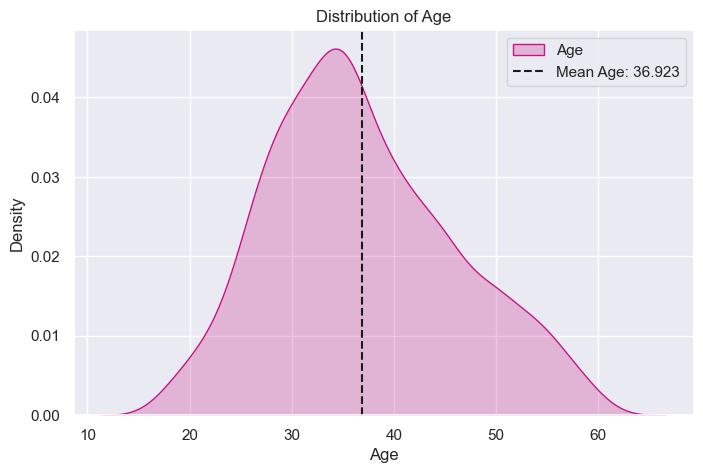

In [171]:
plt.figure(figsize=(8,5))
sns.kdeplot(x=data['Age'],color='MediumVioletRed',shade=True,label='Age')
plt.axvline(x=data['Age'].mean(),color='k',linestyle ="--",label='Mean Age: 36.923')
plt.legend()
plt.title('Distribution of Age')
plt.show()

Perfomance rating based on Age

<Axes: xlabel='Age', ylabel='Count'>

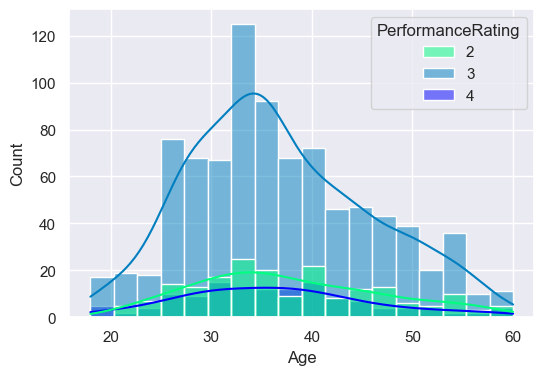

In [172]:
plt.figure(figsize = (6, 4))
sns.histplot(x = 'Age', hue = 'PerformanceRating', data = data , palette='winter_r', kde=True )

4. Education Background

In [173]:
fig = px.pie(data.groupby(['EducationBackground'])['EmpNumber'].count().reset_index(), 
             values='EmpNumber', 
             names='EducationBackground',
            title = 'Employee Education Background')
fig.show()

Perfomance Rating based on Education Background

In [174]:
bus=data.groupby(['EducationBackground','PerformanceRating'],as_index=False)['EmpNumber'].count()
bus.rename(columns={'EmpNumber':'Count'},inplace=True)
fig=go.Figure()
fig = make_subplots(rows=2, cols=3, specs=[[{"type": "pie"}, {"type": "pie"}, {"type": "pie"}],[{"type": "pie"}, {"type": "pie"}, {"type": "pie"}]],subplot_titles=('Life Sciences', 'Medical','Marketing','Technical Degree','Human Resources','Other'))

fig.add_trace(go.Pie(values=bus[bus['EducationBackground']=='Life Sciences']['Count'],labels=bus[bus['EducationBackground']=='Life Sciences']['PerformanceRating'],hole=0.7,marker_colors=['DeepSkyBlue','LightCoral'],name='Life Sciences',showlegend=False),row=1,col=1)
fig.add_trace(go.Pie(values=bus[bus['EducationBackground']=='Medical']['Count'],labels=bus[bus['EducationBackground']=='Medical']['PerformanceRating'],hole=0.7,marker_colors=['DeepSkyBlue','LightCoral'],name='Medical',showlegend=False),row=1,col=2)
fig.add_trace(go.Pie(values=bus[bus['EducationBackground']=='Marketing']['Count'],labels=bus[bus['EducationBackground']=='Marketing']['PerformanceRating'],hole=0.7,marker_colors=['DeepSkyBlue','LightCoral'],name='Marketing',showlegend=True),row=1,col=3)
fig.add_trace(go.Pie(values=bus[bus['EducationBackground']=='Technical Degree']['Count'],labels=bus[bus['EducationBackground']=='Technical Degree']['PerformanceRating'],hole=0.7,marker_colors=['DeepSkyBlue','LightCoral'],name='Technical Degree',showlegend=False),row=2,col=1)
fig.add_trace(go.Pie(values=bus[bus['EducationBackground']=='Human Resources']['Count'],labels=bus[bus['EducationBackground']=='Human Resources']['PerformanceRating'],hole=0.7,marker_colors=['DeepSkyBlue','LightCoral'],name='Human Resources',showlegend=False),row=2,col=2)
fig.add_trace(go.Pie(values=bus[bus['EducationBackground']=='Other']['Count'],labels=bus[bus['EducationBackground']=='Other']['PerformanceRating'],hole=0.7,marker_colors=['DeepSkyBlue','LightCoral'],name='Other',showlegend=False),row=2,col=3)

fig.update_layout(title_x=0.5,template='simple_white',showlegend=True,legend_title_text="PerformanceRating",title_text='<b style="color:black; font-size:100%;">Employee PerformanceRating based on Education Background',font_family="Times New Roman",title_font_family="Times New Roman")
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)))

5. Marital Status

In [175]:
fig = px.pie(data.groupby(['MaritalStatus'])['EmpNumber'].count().reset_index(), 
             values='EmpNumber', 
             names='MaritalStatus',
            title = 'Employee Marital Status')
fig.show()

Employee perfomance based on Marital Status

In [176]:
bus=data.groupby(['MaritalStatus','PerformanceRating'],as_index=False)['EmpNumber'].count()
bus.rename(columns={'EmpNumber':'Count'},inplace=True)
fig=go.Figure()
fig = make_subplots(rows=2, cols=3, specs=[[{"type": "pie"}, {"type": "pie"}, {"type": "pie"}],[{"type": "pie"}, {"type": "pie"}, {"type": "pie"}]],subplot_titles=('Married', 'Divorced','Single'))

fig.add_trace(go.Pie(values=bus[bus['MaritalStatus']=='Married']['Count'],labels=bus[bus['MaritalStatus']=='Married']['PerformanceRating'],hole=0.7,marker_colors=['DeepSkyBlue','LightCoral'],name='Married',showlegend=False),row=1,col=1)
fig.add_trace(go.Pie(values=bus[bus['MaritalStatus']=='Divorced']['Count'],labels=bus[bus['MaritalStatus']=='Divorced']['PerformanceRating'],hole=0.7,marker_colors=['DeepSkyBlue','LightCoral'],name='Divorced',showlegend=False),row=1,col=2)
fig.add_trace(go.Pie(values=bus[bus['MaritalStatus']=='Single']['Count'],labels=bus[bus['MaritalStatus']=='Single']['PerformanceRating'],hole=0.7,marker_colors=['DeepSkyBlue','LightCoral'],name='Single',showlegend=True),row=1,col=3)

fig.update_layout(title_x=0.5,template='simple_white',showlegend=True,legend_title_text="PerformanceRating",title_text='<b style="color:black; font-size:100%;">Employee PerformanceRating based on Marital Status',font_family="Times New Roman",title_font_family="Times New Roman")
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)))

6. Employee Job role

In [177]:
fig = px.pie(data.groupby(['EmpJobRole'])['EmpNumber'].count().reset_index(), 
             values='EmpNumber', 
             names='EmpJobRole',
            title = 'Employee Job Role')
fig.show()

Employee perfomance rating based on Employee Job role

In [178]:
fig = px.bar(data.groupby(['EmpJobRole',
                                                'PerformanceRating'])['EmpNumber'].count().reset_index(),
             x="EmpNumber",
             y="EmpJobRole", 
             color="PerformanceRating", 
             text = 'EmpNumber'
            )
fig.show()

Developers has the best employee perfomance followed by sales executive

7. Business Travel Frequency

In [179]:
fig = px.pie(data.groupby(['BusinessTravelFrequency'])['EmpNumber'].count().reset_index(), 
             values='EmpNumber', 
             names='BusinessTravelFrequency',
            title = 'Employee Business Travel Frequency')
fig.show()

Perfomance based on Business Travel Frequency

In [180]:
fig = px.bar(data.groupby(['BusinessTravelFrequency',
                                                'PerformanceRating'])['EmpNumber'].count().reset_index(),
             x="EmpNumber",
             y="BusinessTravelFrequency", 
             color="PerformanceRating", 
             text = 'EmpNumber'
            )
fig.show()

8. Perfomance rating based on TotalWorkExperienceInYears, ExperienceYearsAtThisCompany, YearsSinceLastPromotion and ExperienceYearsInCurrentRole

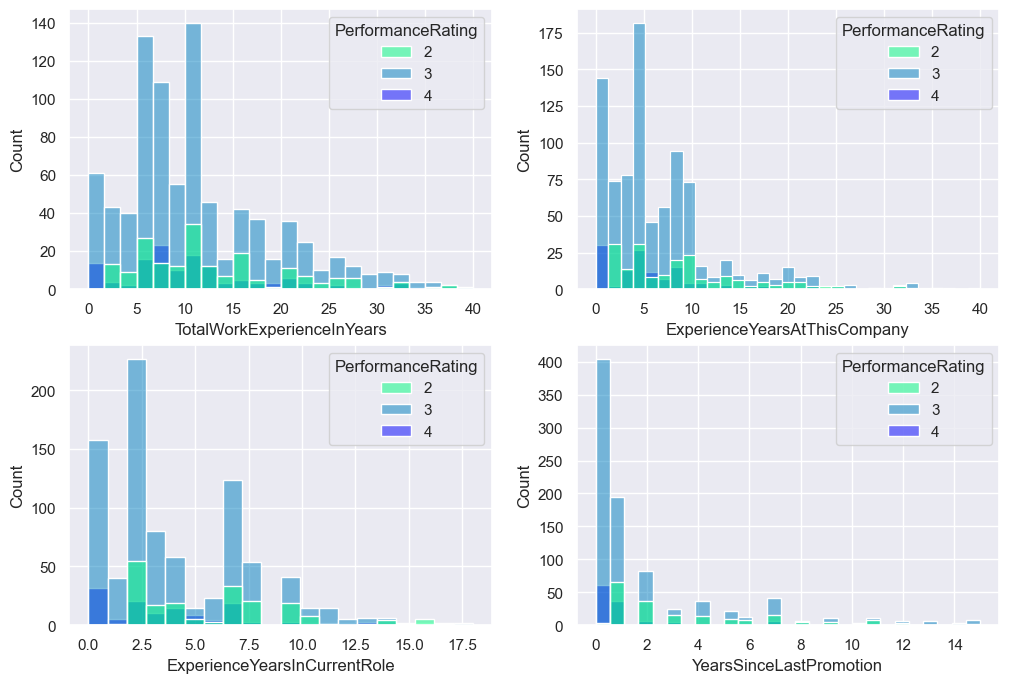

In [181]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.histplot(x= 'TotalWorkExperienceInYears' ,data =data ,palette='winter_r',hue='PerformanceRating')
plt.subplot(2,2,2)
sns.histplot(x= 'ExperienceYearsAtThisCompany' ,data =data ,palette='winter_r',hue='PerformanceRating')
plt.subplot(2,2,3)
sns.histplot(x= 'ExperienceYearsInCurrentRole' ,data =data ,palette='winter_r',hue='PerformanceRating')
plt.subplot(2,2,4)
sns.histplot(x= 'YearsSinceLastPromotion' ,data =data ,palette='winter_r',hue='PerformanceRating')
plt.show()

9. Perfomance rating based on Distance From Home

<Axes: xlabel='DistanceFromHome', ylabel='count'>

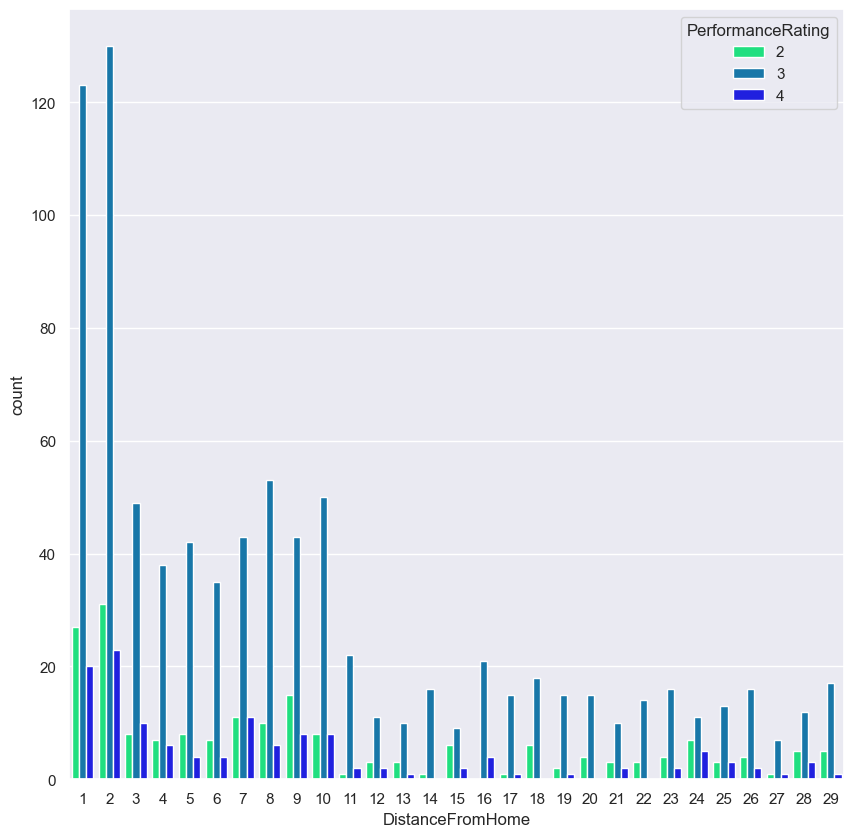

In [182]:
plt.figure(figsize = (10 , 10))
sns.countplot(x= 'DistanceFromHome' ,data = data ,palette='winter_r'  ,hue =data['PerformanceRating'])

Employees with a distance from home of upto 3 has the best performance.

10. Employee perfomance based on Employee Hourly Rate

<Axes: xlabel='EmpHourlyRate', ylabel='Count'>

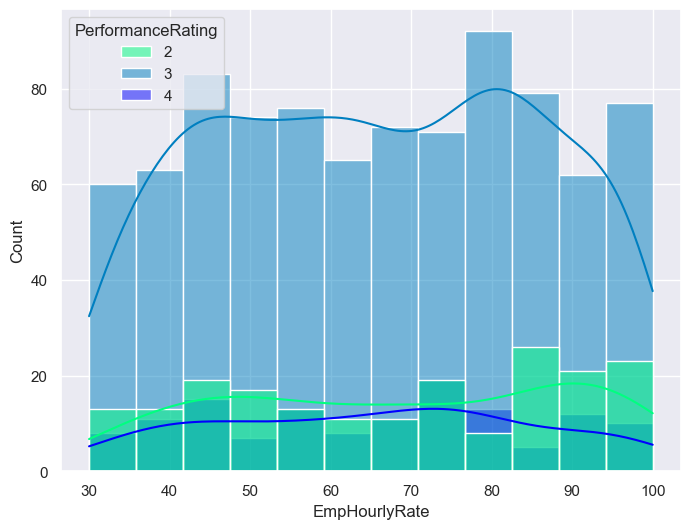

In [183]:
plt.figure(figsize = (8, 6))
sns.histplot(x = 'EmpHourlyRate', hue = 'PerformanceRating', data = data , palette='winter_r', kde=True )

Only employees paid 80 have a perfomance rating of 4

11. OverTime

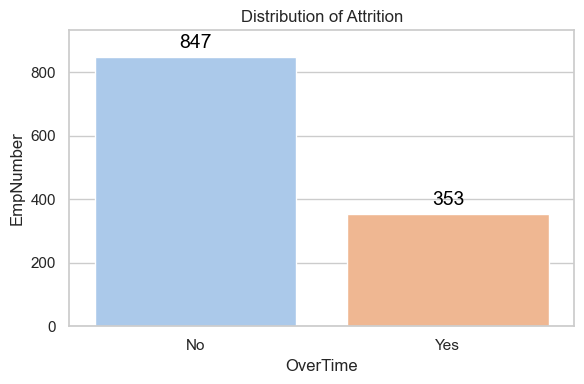

In [184]:
# number of Attrition
exit_counts = data['OverTime'].value_counts()
exit_percentages = exit_counts

sns.set_style('whitegrid')
plt.figure(figsize=(6,4))
ax = sns.barplot(x=exit_counts.index, y=exit_counts.values, palette='pastel')
ax.set(xlabel='OverTime', ylabel='EmpNumber', title='Distribution of Attrition')
plt.xticks([0, 1], ['No', 'Yes'])
plt.ylim(top=max(exit_counts.values)*1.1)

# add counting number on top of each bar
for i, v in enumerate(exit_percentages):
    ax.text(i, exit_counts.values[i]+30, f'{v}', fontsize=14, color='black', ha='center')

plt.tight_layout()
plt.show()

Employee perfomance based on OverTime

<Axes: xlabel='OverTime', ylabel='count'>

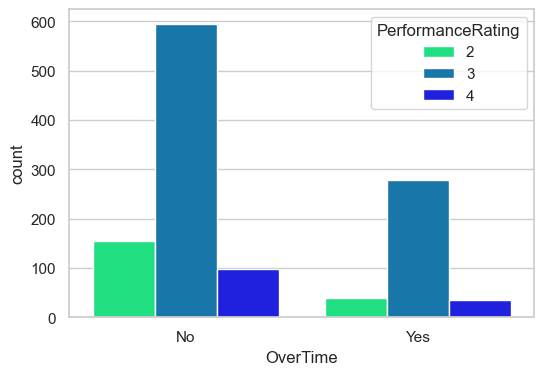

In [185]:
plt.figure(figsize = (6 , 4))
sns.countplot(x= 'OverTime' ,data = data ,palette='winter_r'  ,hue =data['PerformanceRating'])

FEATURE SELECTION

This is the method of reducing the input variable to your model by using only relevant data and getting rid of noise in data.

In [186]:
#Removing all unimportant column
data = data.drop(['EmpNumber'], axis = 1)

data.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,...,4,10,2,2,10,7,0,8,No,3
1,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,...,4,20,2,3,7,7,1,7,No,3
2,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,...,3,20,2,3,18,13,1,12,No,4
3,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,...,2,23,2,2,21,6,12,6,No,3
4,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,...,4,10,1,3,2,2,2,2,No,3


In [191]:
# split data into target and features
X = data.drop(columns = ['PerformanceRating'])
y = data['PerformanceRating'].values

In [192]:
#use label encoding to convert categorical variables to numerical
data['PerformanceRating'].replace(to_replace='Yes', value=1, inplace=True)
data['PerformanceRating'].replace(to_replace='No',  value=0, inplace=True)

def encode_data(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

data = data.apply(lambda x: encode_data(x))
data.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,1,2,2,5,13,2,10,3,4,...,4,10,2,2,10,7,0,8,0,3
1,47,1,2,2,5,13,2,14,4,4,...,4,20,2,3,7,7,1,7,0,3
2,40,1,1,1,5,13,1,5,4,4,...,3,20,2,3,18,13,1,12,0,4
3,41,1,0,0,3,8,2,10,4,2,...,2,23,2,2,21,6,12,6,0,3
4,60,1,2,2,5,13,2,16,4,1,...,4,10,1,3,2,2,2,2,0,3


Create Training, Validation, and Test Sets

In [193]:
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.7, random_state=21)
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=21)

print("Train Shape:", X_train.shape, y_train.shape)
print("Validation set Shape:", X_val.shape,y_val.shape)
print("Test set Shape:", X_test.shape, y_test.shape)

Train Shape: (840, 26) (840,)
Validation set Shape: (180, 26) (180,)
Test set Shape: (180, 26) (180,)


In [194]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_val = pd.DataFrame(scaler.transform(X_val), columns=X_val.columns)
X_test=pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
X_train.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,...,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,1.652003,0.800391,-0.965684,1.266444,1.041261,0.835457,0.591916,-0.504902,0.081876,-0.659956,...,1.055121,0.283493,-0.184885,-0.621295,-1.094071,0.144812,0.712306,1.499625,0.864318,2.391652
1,-1.451192,0.800391,-0.965684,-0.120535,-1.343631,-1.910836,0.591916,1.075358,-1.883150,-0.659956,...,-0.901395,0.283493,-0.702994,-0.621295,0.371670,-0.337894,-0.369189,-0.357861,-0.595914,-0.418121
2,-0.675394,0.800391,0.543478,-0.120535,0.445038,-0.009557,0.591916,0.224449,-0.900637,0.260913,...,-0.901395,1.210084,-0.702994,-0.621295,-1.094071,-0.176992,0.171559,-0.667442,-0.887960,-0.418121
3,-0.232080,-1.249390,0.543478,-0.120535,1.041261,0.835457,0.591916,1.075358,0.081876,0.260913,...,0.216614,-0.643098,-0.832521,0.181609,0.371670,-0.337894,-0.639563,-0.357861,-1.180007,-0.418121
4,0.987032,0.800391,-0.965684,1.266444,1.041261,0.835457,-2.367665,2.047826,-0.900637,-0.659956,...,-0.062888,0.283493,-0.702994,0.181609,0.371670,-0.820601,-0.639563,-0.048280,-0.595914,-0.418121


In [195]:
# Parameter tuning ot Random Forest
grid = {'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 500, num = 5)],
        'max_features': [None, 'sqrt'],
        'max_depth': [None, 5, 7, 14, 21],
        'min_samples_split': [2, 5, 8],
        'min_samples_leaf': [3, 4, 5],
        'bootstrap': [True, False]}

rf=RandomForestClassifier(random_state=92)
rf_cv=RandomizedSearchCV(estimator=rf, param_distributions=grid, scoring='roc_auc', 
                         n_iter=100, cv=5, random_state=92, n_jobs=-1)
rf_cv.fit(X_train, y_train)
print("Grid Search CV Best AUC = {:.3f}\nBest Params: {}".format(rf_cv.best_score_, rf_cv.best_estimator_))

Grid Search CV Best AUC = nan
Best Params: RandomForestClassifier(bootstrap=False, max_depth=14, max_features=None,
                       min_samples_leaf=5, min_samples_split=8,
                       n_estimators=200, random_state=92)


In [197]:
#Feature importance
col=sns.color_palette("mako", 20).as_hex()[::-1]
feat=pd.DataFrame({"Importance": rf_cv.best_estimator_.feature_importances_}, index=X_train.columns
                 ).sort_values(by="Importance")
plot_df=feat.nlargest(15, columns='Importance').sort_values(by="Importance", ascending=False)
fig = px.bar(plot_df, x=plot_df.index, y='Importance', text='Importance', 
             color=plot_df.index, opacity=0.7, color_discrete_sequence=col)
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside',
                  marker_line=dict(width=1, color='#3F3B3A'), 
                  hovertemplate='%{x}<br>Importance = %{y:.2f}')
fig.update_layout(title_text='Top Important Predictors of Employee Perfomance', 
                  coloraxis_showscale=False, showlegend=False,font_color="#303030", height = 500,
                  paper_bgcolor='white', plot_bgcolor='white', yaxis_title="Importance", 
                  xaxis = dict(title="", showgrid=True, gridcolor="#f5f5f5"))
fig.show()

Top 3 factors affecting employee performance are;
1.	Employee Last Salary Hike Percent
2.	Employee Environment Satisfaction
3.	Years Since Last Promotion

MODEL EVALUATION AND PREDICTION

1. KNN- Neighbors

In [ ]:
knn=KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train,y_train)

y_pred=knn.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,mean_squared_error,r2_score
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("Training Score: ",knn.score(X_train,y_train)*100)
print(knn.score(X_test,y_test))

              precision    recall  f1-score   support

           2       0.42      0.32      0.36        31
           3       0.77      0.90      0.83       131
           4       0.33      0.06      0.10        18

    accuracy                           0.72       180
   macro avg       0.51      0.43      0.43       180
weighted avg       0.67      0.72      0.68       180

[[ 10  21   0]
 [ 11 118   2]
 [  3  14   1]]
Training Score:  82.02380952380952
0.7166666666666667


In [ ]:
print(accuracy_score(y_test,y_pred)*100)

71.66666666666667


In [ ]:
conf_matrix_knn = confusion_matrix(y_test, y_pred)
print(conf_matrix_knn )

[[ 10  21   0]
 [ 11 118   2]
 [  3  14   1]]


2. Random Forest

In [ ]:
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred=rfc.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,mean_squared_error
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("Training Score: ",rfc.score(X_train,y_train)*100)

              precision    recall  f1-score   support

           2       0.93      0.81      0.86        31
           3       0.93      0.96      0.94       131
           4       0.82      0.78      0.80        18

    accuracy                           0.92       180
   macro avg       0.89      0.85      0.87       180
weighted avg       0.92      0.92      0.92       180

[[ 25   6   0]
 [  2 126   3]
 [  0   4  14]]
Training Score:  100.0


In [ ]:
print(accuracy_score(y_test,y_pred)*100)

91.66666666666666


In [ ]:
conf_matrix_rfc = confusion_matrix(y_test, y_pred)
print(conf_matrix_rfc)

[[ 25   6   0]
 [  2 126   3]
 [  0   4  14]]


3. Logistic regression

In [ ]:
reg = LogisticRegression()
reg.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred=reg.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,r2_score
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("Training Score: ",reg.score(X_train,y_train)*100)

              precision    recall  f1-score   support

           2       0.50      0.48      0.49        31
           3       0.86      0.89      0.87       131
           4       0.80      0.67      0.73        18

    accuracy                           0.79       180
   macro avg       0.72      0.68      0.70       180
weighted avg       0.79      0.79      0.79       180

[[ 15  15   1]
 [ 13 116   2]
 [  2   4  12]]
Training Score:  85.59523809523809


In [ ]:
print(accuracy_score(y_test,y_pred)*100)

79.44444444444444


In [ ]:
conf_matrix_reg = confusion_matrix(y_test, y_pred)
print(conf_matrix_reg)

[[ 15  15   1]
 [ 13 116   2]
 [  2   4  12]]


4. Decision Tree Classifier

In [ ]:
dtree = DecisionTreeClassifier(max_depth=6, random_state=123)

dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, random_state=123)

In [ ]:
y_pred=dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,mean_squared_error
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("Training Score: ",dtree.score(X_train,y_train)*100)

              precision    recall  f1-score   support

           2       0.83      0.81      0.82        31
           3       0.93      0.90      0.91       131
           4       0.61      0.78      0.68        18

    accuracy                           0.87       180
   macro avg       0.79      0.83      0.81       180
weighted avg       0.88      0.87      0.88       180

[[ 25   6   0]
 [  4 118   9]
 [  1   3  14]]
Training Score:  97.26190476190476


In [ ]:
print(accuracy_score(y_test,y_pred)*100)

87.22222222222223


In [ ]:
conf_matrix_dtree = confusion_matrix(y_test, y_pred)
print(conf_matrix_dtree)

[[ 25   6   0]
 [  4 118   9]
 [  1   3  14]]


5. Gradient Boosting Classifier

In [ ]:
gbc=GradientBoostingClassifier()
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [ ]:
y_pred=gbc.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,mean_squared_error,r2_score
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print("Training Score: ",gbc.score(X_train,y_train)*100)
print(gbc.score(X_test,y_test))

              precision    recall  f1-score   support

           2       0.81      0.81      0.81        31
           3       0.92      0.93      0.93       131
           4       0.82      0.78      0.80        18

    accuracy                           0.89       180
   macro avg       0.85      0.84      0.84       180
weighted avg       0.89      0.89      0.89       180

[[ 25   6   0]
 [  6 122   3]
 [  0   4  14]]
Training Score:  99.76190476190476
0.8944444444444445


In [ ]:
print(accuracy_score(y_test,y_pred)*100)

89.44444444444444


In [ ]:
conf_matrix_gbc = confusion_matrix(y_test, y_pred)
print(conf_matrix_gbc)

[[ 25   6   0]
 [  6 122   3]
 [  0   4  14]]


CONCLUSION
Random Forest Classifier has the most accuracy prediction with an accuracy score of 91.67%

RECOMMENDATION
Company should;
1. Appreciate their employees by still giving promotion and they should get a raise in their salaries.
2.  Fairly pay employees at the same job level, same job involvement, same job role with almost equal monthly income.
3. Invest in Employee Development: - Offer stock options to more employees especially new recruits as an incentive. 
4. Offer Competitive Compensation and Benefits: - Increase allowance for employees to work overtime, and make sure that those working overtime are being paid more than those who are not. 
5. Create a Positive Work Environment to create a more stable and productive workforce: - companies should remember to appreciate their employees and work on the harmonic balance of their company.
